In [28]:
import copy
import os
from pylabel import importer

data_path = 'TACO/data/'
ann_path = data_path + 'annotations.json'

dataset = importer.ImportCoco(ann_path)
dataset.df.head()

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,batch_1/000006.jpg,,0,1537,2049,,,517.0,127.0,...,0,,,,,6,Glass bottle,Bottle,,1
1,,batch_1/000008.jpg,,1,1537,2049,,,1.0,457.0,...,0,,,,,18,Meal carton,Carton,,1
2,,batch_1/000008.jpg,,1,1537,2049,,,531.0,292.0,...,0,,,,,14,Other carton,Carton,,1
3,,batch_1/000010.jpg,,2,1537,2049,,,632.0,987.0,...,0,,,,,5,Clear plastic bottle,Bottle,,1
4,,batch_1/000010.jpg,,2,1537,2049,,,632.0,989.0,...,0,,,,,7,Plastic bottle cap,Bottle cap,,1


In [30]:
dataset.df.img_path = dataset.df.img_filename.apply(lambda x: os.path.join(data_path, x))
dataset.df.img_filename = dataset.df.img_filename.apply(lambda x: x.replace('/', '_'))
dataset.df = dataset.df.sort_values(by="img_filename").reset_index(drop=True)
dataset.df.head()


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
0,,batch_10_000000.jpg,TACO/data/batch_10/000000.jpg,101,1824,4000,,,1370.0,1291.00000,...,0,,,,,5,Clear plastic bottle,Bottle,,1
1,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,247.0,101.04761,...,0,,,,,4,Other plastic bottle,Bottle,,1
2,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,247.0,427.04760,...,0,,,,,7,Plastic bottle cap,Bottle cap,,1
3,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,295.0,75.04761,...,0,,,,,58,Unlabeled litter,Unlabeled litter,,1
4,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,869.0,718.04760,...,0,,,,,58,Unlabeled litter,Unlabeled litter,,1


In [32]:
selected_catname = dataset.df.groupby("cat_name").filter(lambda x: len(x) >= 50).cat_name.unique()
selected_catname = [cat for cat in selected_catname if cat not in ['Cigarette', 'Unlabeled litter', 'Plastic film', 'Other plastic wrapper', 'Broken glass', 'Styrofoam', 'Pop tab', 'Plastic lid', 'Paper cup', 'Aluminium foil', 'Single-use carrier bag']]
dataset.df = dataset.df[dataset.df.cat_name.isin(selected_catname)]
print(selected_catname)

['Clear plastic bottle', 'Other plastic bottle', 'Plastic bottle cap', 'Other plastic', 'Disposable plastic cup', 'Glass bottle', 'Metal bottle cap', 'Drink can', 'Normal paper', 'Plastic straw', 'Corrugated carton', 'Other carton', 'Styrofoam piece']


In [33]:
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of classes: 13
Classes:['Other plastic bottle', 'Clear plastic bottle', 'Glass bottle', 'Plastic bottle cap', 'Metal bottle cap', 'Drink can', 'Other carton', 'Corrugated carton', 'Disposable plastic cup', 'Other plastic', 'Normal paper', 'Plastic straw', 'Styrofoam piece']
Class counts:
cat_name
Clear plastic bottle      285
Other plastic             273
Drink can                 229
Plastic bottle cap        209
Plastic straw             157
Styrofoam piece           112
Disposable plastic cup    104
Glass bottle              104
Other carton               93
Normal paper               82
Metal bottle cap           80
Corrugated carton          64
Other plastic bottle       50
Name: count, dtype: int64


In [34]:
dataset.df.head()

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
0,,batch_10_000000.jpg,TACO/data/batch_10/000000.jpg,101,1824,4000,,,1370.0000,1291.00000,...,0,,,,,5,Clear plastic bottle,Bottle,,1
1,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,247.0000,101.04761,...,0,,,,,4,Other plastic bottle,Bottle,,1
2,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,247.0000,427.04760,...,0,,,,,7,Plastic bottle cap,Bottle cap,,1
8,,batch_10_000001.jpg,TACO/data/batch_10/000001.jpg,102,4000,1824,,,2577.0952,423.04760,...,0,,,,,5,Clear plastic bottle,Bottle,,1
15,,batch_10_000002.jpg,TACO/data/batch_10/000002.jpg,103,4000,1824,,,1224.0000,1159.00000,...,0,,,,,7,Plastic bottle cap,Bottle cap,,1


In [38]:
dataset.df = dataset.df.reset_index(drop=True)
dataset.splitter.GroupShuffleSplit(train_pct=.8, test_pct=.2, val_pct=0)
dataset.analyze.ShowClassSplits()

,all,train,test
cat_name,,,


In [39]:
print(dataset.df['split'].value_counts())
print(dataset.df.groupby('split')['cat_name'].value_counts())

split
train    1473
test      369
Name: count, dtype: int64
split  cat_name              
test   Clear plastic bottle       58
       Drink can                  54
       Other plastic              51
       Plastic bottle cap         31
       Styrofoam piece            27
       Plastic straw              23
       Disposable plastic cup     22
       Glass bottle               20
       Other carton               20
       Metal bottle cap           18
       Normal paper               18
       Corrugated carton          16
       Other plastic bottle       11
train  Clear plastic bottle      227
       Other plastic             222
       Plastic bottle cap        178
       Drink can                 175
       Plastic straw             134
       Styrofoam piece            85
       Glass bottle               84
       Disposable plastic cup     82
       Other carton               73
       Normal paper               64
       Metal bottle cap           62
       Corrugated cart

In [41]:
train = copy.deepcopy(dataset)
test = copy.deepcopy(dataset)

train.df = train.df[train.df['split'] == 'train']
test.df = test.df[test.df['split'] == 'test']
train_path = 'data13/train'
test_path = 'data13/test'

if not os.path.exists(train_path):
        os.makedirs(train_path)
        
if not os.path.exists(test_path):
        os.makedirs(test_path)

train.export.ExportToVoc(output_path=os.path.join(train_path), path_=True)
test.export.ExportToVoc(output_path=os.path.join(test_path), path_=True)[0]

Exporting VOC files...: 100%|██████████| 307/307 [00:00<00:00, 378.70it/s]


'data13\\test\\batch_2_000082.xml'

In [42]:
print(train.df['img_filename'].head())

0    batch_10_000000.jpg
2    batch_10_000001.jpg
3    batch_10_000001.jpg
4    batch_10_000002.jpg
5    batch_10_000002.jpg
Name: img_filename, dtype: object


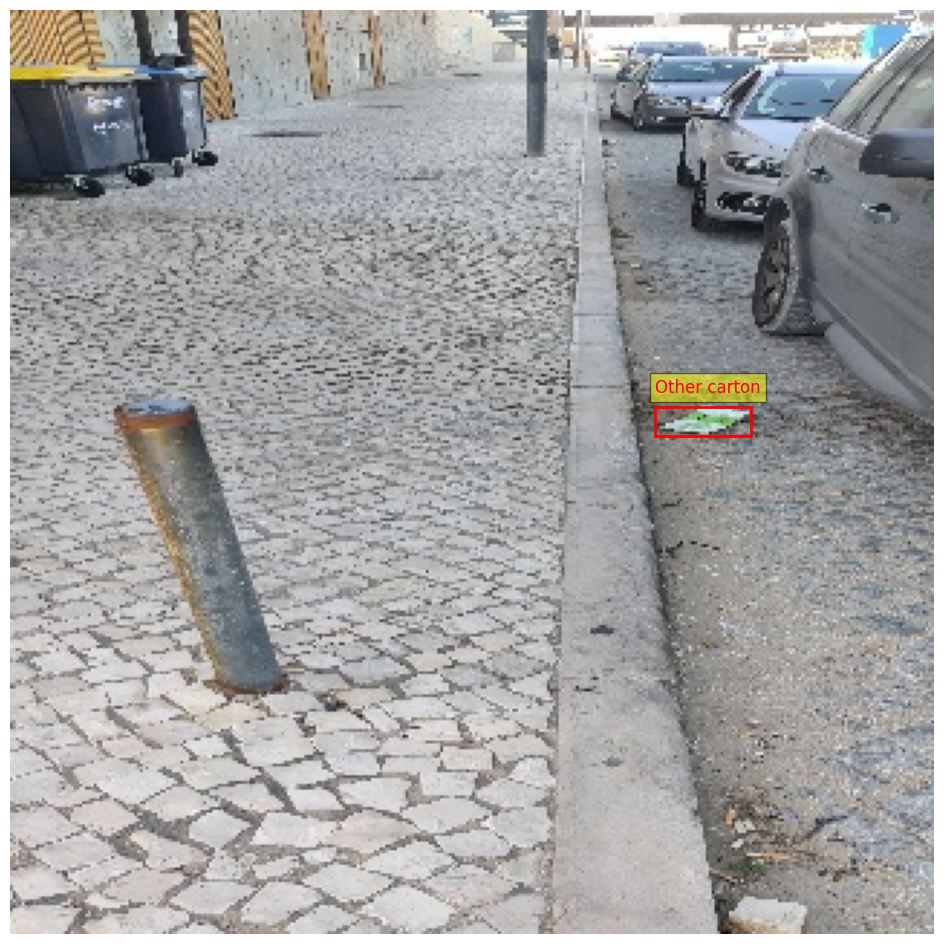

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageOps

def visualize_voc(voc_file):
    tree = ET.parse(voc_file)
    root = tree.getroot()
    
    filename = root.find('filename').text
    image_path = root.find('path').text
    
    try:
        image = Image.open(image_path)
        # Apply orientation correction based on EXIF data
        # image = ImageOps.exif_transpose(image)
    except FileNotFoundError:
        raise FileNotFoundError(f"Image file not found at {image_path}. Please verify the path in the XML file.")
    
    # Get original image size from the XML file
    orig_width = int(root.find('size/width').text)
    orig_height = int(root.find('size/height').text)
    
    # Get current image size after loading it
    img_width, img_height = image.size

    # Scaling factors to adjust bounding box
    x_scale = img_width / orig_width
    y_scale = img_height / orig_height

    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)

    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(int(bndbox.find('xmin').text) * x_scale)
        xmax = int(int(bndbox.find('xmax').text) * x_scale)
        ymin = int(int(bndbox.find('ymin').text) * y_scale)
        ymax = int(int(bndbox.find('ymax').text) * y_scale)

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        ax.text(xmin, ymin - 5, name, color='red', fontsize=12, 
                bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.axis('off')
    plt.show()

# visualize_voc("new21/train/batch_11_000098.xml")
visualize_voc("data13_320/test_ann/batch_10_000036.xml")


In [11]:
label_name = ['Other plastic bottle', 'Clear plastic bottle', 'Glass bottle', 'Plastic bottle cap', 'Metal bottle cap', 'Drink can', 'Other carton', 'Corrugated carton', 'Disposable plastic cup', 'Other plastic', 'Normal paper', 'Plastic straw', 'Styrofoam piece']
labels = []
num_id = 1
for label in label_name:
    labels.append({'name': label, 'id': num_id})
    num_id += 1
    
with open('data13_320/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [8]:
import os
import xml.etree.ElementTree as ET
import cv2

def resize_and_update_voc(xml_dir, output_image_dir, output_xml_dir, new_size=(320, 320)):
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_xml_dir, exist_ok=True)
    
    for xml_file in os.listdir(xml_dir):
        if not xml_file.endswith('.xml'):
            continue

        xml_path = os.path.join(xml_dir, xml_file)
        
        tree = ET.parse(xml_path)
        root = tree.getroot()

        image_path = root.find('path').text
        filename = root.find('filename').text

        try:
            # Read image with OpenCV (BGR format)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Image file not found or cannot be opened: {image_path}")
                continue
        except FileNotFoundError:
            print(f"Image file not found: {image_path}")
            continue
        
        # Resize the image to the new size (320x320)
        image_resized = cv2.resize(image, new_size)

        # Convert the resized image to RGB format (since OpenCV uses BGR)
        image_resized_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

        # Save the resized image
        new_image_path = os.path.join(output_image_dir, filename)
        cv2.imwrite(new_image_path, cv2.cvtColor(image_resized_rgb, cv2.COLOR_RGB2BGR))

        # Update the XML with the new path and size
        root.find('path').text = new_image_path
        size_elem = root.find('size')
        if size_elem is not None:
            size_elem.find('width').text = str(new_size[0])
            size_elem.find('height').text = str(new_size[1])
        else:
            size_elem = ET.SubElement(root, 'size')
            ET.SubElement(size_elem, 'width').text = str(new_size[0])
            ET.SubElement(size_elem, 'height').text = str(new_size[1])
            ET.SubElement(size_elem, 'depth').text = '3'

        # Adjust the bounding boxes
        for obj in root.findall('object'):
            bndbox = obj.find('bndbox')
            if bndbox is not None:
                xmin = int(bndbox.find('xmin').text)
                xmax = int(bndbox.find('xmax').text)
                ymin = int(bndbox.find('ymin').text)
                ymax = int(bndbox.find('ymax').text)

                scale_x = new_size[0] / image.shape[1]
                scale_y = new_size[1] / image.shape[0]
                bndbox.find('xmin').text = str(int(xmin * scale_x))
                bndbox.find('xmax').text = str(int(xmax * scale_x))
                bndbox.find('ymin').text = str(int(ymin * scale_y))
                bndbox.find('ymax').text = str(int(ymax * scale_y))

        # Save the updated XML
        new_xml_path = os.path.join(output_xml_dir, xml_file)
        tree.write(new_xml_path)



In [9]:
resize_and_update_voc(
    xml_dir="data13/train",
    output_image_dir="TACO/data13_320/train",
    output_xml_dir="data13_320/train"
)

resize_and_update_voc(
    xml_dir="data13/test",
    output_image_dir="TACO/data13_320/test",
    output_xml_dir="data13_320/test"
)

In [ ]:
python utilities\generate_tfrecord.py -x data13_320\train -l data13_320\label_map.pbtxt -o data13_320\train.record -i TACO\data13_320\train

In [ ]:
python utilities\generate_tfrecord.py -x data13_320\test -l data13_320\label_map.pbtxt -o data13_320\test.record -i TACO\data13_320\test